###### Importing

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# MatPlot

### Day 1 - Line Plots

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


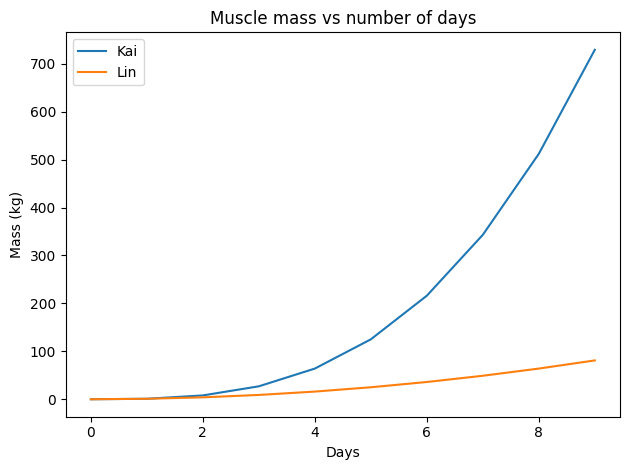

In [2]:
from matplotlib import pyplot as plt
import numpy as np
# plt.xkcd()
plt.rcdefaults()
print(plt.style.available)
width=0.5

dev_x = np.array(list(range(10)))
dev_y = np.multiply(np.array(dev_x),(np.array(dev_x)))
dev_y1 = np.power(np.array(dev_x),3)

plt.title('Muscle mass vs number of days')
plt.xlabel('Days')
plt.ylabel('Mass (kg)')

plt.plot(dev_x,dev_y1)
plt.plot(dev_x,dev_y)
plt.legend(["Bob","Sam"]) # Legends
plt.tight_layout()
plt.show()

## Day 2 - Bar Charts and CSVs

The following uses the collections module. It's a bit messy, but still interesting

In [3]:
import csv
from collections import Counter
plt.style.use('fivethirtyeight')
counter = Counter()

Using the CSV module:

In [4]:


with open ('/content/sample_data/california_housing_train.csv') as csv_file:
  csv_reader = csv.DictReader(csv_file)
  counter = Counter()
  for row in csv_reader:
    counter.update(row['median_house_value'].split(';'))



Using the pandas dataframe module:

In [5]:
import pandas as pd
data=pd.read_csv('/content/sample_data/california_housing_train.csv')
pval = data['median_house_value']

p_counter = Counter()
p_counter.update(pval)
counter = p_counter



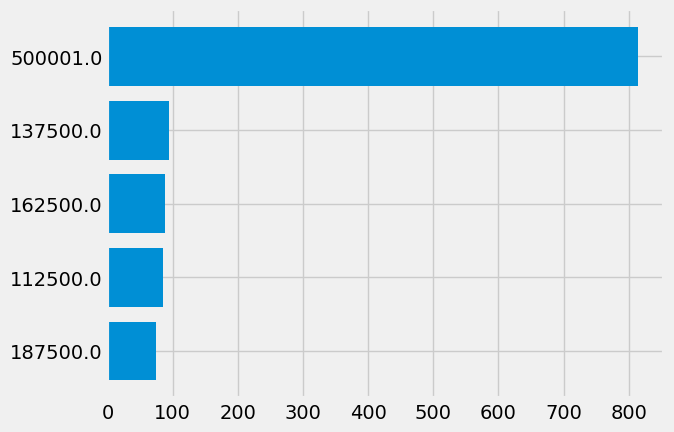

In [6]:
values=[]
freq = []

for i in counter.most_common(5):
  values.append(str(i[0]))
  freq.append(i[1])

values.reverse()
freq.reverse()

plt.barh(values,freq)
plt.show()



## Day 3 - Pie Charts

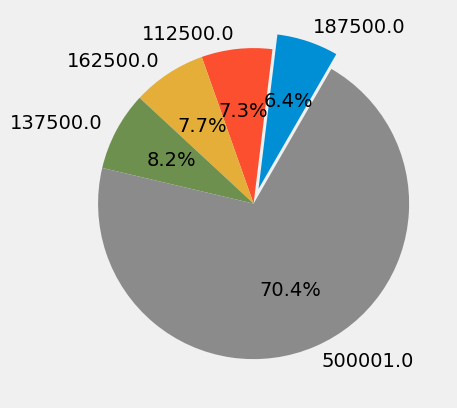

['187500.0', '112500.0', '162500.0', '137500.0', '500001.0']


In [7]:
slices = [10,20,30,40]
labels = ['Chocolate','Vanilla','Mint','Strawberry']
explode = [0.1,0,0,0,0]
slices.sort()
plt.pie(freq,labels=values,explode = explode,startangle=60,autopct='%0.1f%%')
plt.show()
print(values)

## Day 4 - Stack Plots


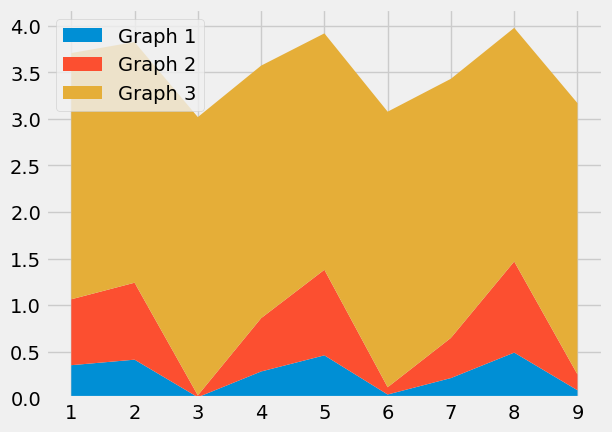

In [8]:
arr = np.array(range(9))+1
labels = ["Graph 1","Graph 2","Graph 3",]
plt.stackplot(arr, 0.5*np.sin(arr)**2,np.sin(arr)**2,3-0.5*np.sin(arr)**2,labels=labels)
plt.legend(loc="upper left")

## Day 5 - Plot Fills

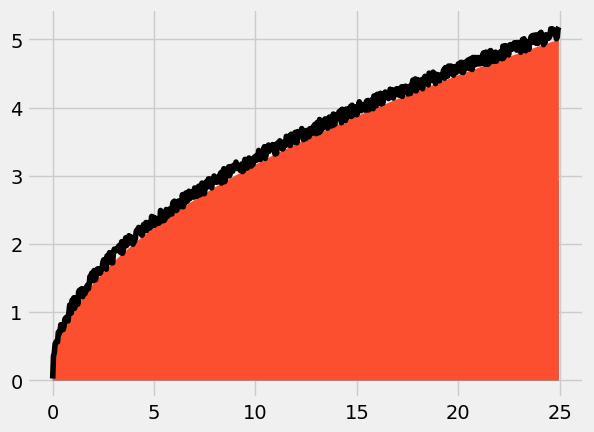

In [9]:
arr = np.array(range(25*25))
rand1 = np.random.rand(1,25*25)
sum = np.add(arr**0.5,rand1)
plt.plot(arr/25,  sum.T/5, color='black')
plt.fill_between(arr/25,(arr/25)**(1/3))
plt.fill_between(arr/25,(arr/25)**0.5)
# list(range(25)).shape


## Day 10 - Sub Plots

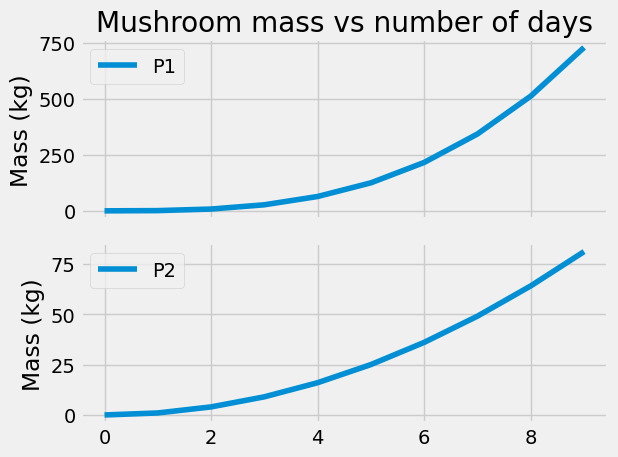

In [13]:
fig,ax = plt.subplots(nrows = 2, ncols=1,sharex=True)


ax[0].plot(dev_x,dev_y1) 
ax[1].plot(dev_x,dev_y)
ax[0].set_title('Mushroom mass vs number of days')
ax[0].set_ylabel('Mass (kg)')
ax[1].set_ylabel('Mass (kg)')

ax[0].legend(['P1'])
ax[1].legend(['P2'])
# ax[0].set_xlabel('Days')
ax[0].set_ylabel('Mass (kg)')
plt.tight_layout()


# Credits

I used Corey Schafer's youtube series. 

You can find the first episode of his playlist [here](https://www.youtube.com/watch?v=UO98lJQ3QGI)